In [1]:
import numpy as np
import os
import cv2
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
tf.compat.v1.reset_default_graph()

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
def label_name(image_name):
    name = image_name.split('.')[-3] #eka image
    if name=="eka":
        return np.array([1,0,0])
    elif name=="pakesa":
        return np.array([0,1,0])
def my_data():
    data = []
    for img in tqdm(os.listdir("coba")):
        path=os.path.join("coba",img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (128,128))
        data.append([np.array(img_data), label_name(img)])
    shuffle(data)  
    return data
data = my_data()

train = data[:650]  
test = data[650:]
X_train = np.array([i[0] for i in train]).reshape(-1,128,128,1)
print(X_train.shape)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1,128,128,1)
print(X_test.shape)
y_test = [i[1] for i in test]

100%|███████████████████████████████████████████████████████████████████████████████| 765/765 [00:03<00:00, 217.10it/s]

(650, 128, 128, 1)
(115, 128, 128, 1)


In [ ]:
print('x_train : {}'.format(X_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(X_test.shape))

In [3]:


convnet = input_data(shape=[128,128,1])
convnet = conv_2d(convnet, 32, 5, activation='relu', name='conv1')
# 32 = Filters, 5 = Stride represent the every single move of pixels
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu', name='conv2')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu', name='conv3')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu', name='conv5')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu', name='conv6')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu', name='conv7')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu', name='FC1')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 3, activation='softmax', name='FC2')
convnet = regression(convnet, optimizer='adam', learning_rate = 0.001, loss='categorical_crossentropy', name='outlayer')
model = tflearn.DNN(convnet, checkpoint_path='/tmp/tflearn_logs/',max_checkpoints=1,tensorboard_verbose=3)
model.fit(X_train, y_train, n_epoch=100, validation_set=(X_test, y_test), show_metric = True, run_id="FRS", callbacks=[])


Training Step: 1099  | total loss: 0.30998 | time: 23.278s
| Adam | epoch: 100 | loss: 0.30998 - acc: 0.9480 -- iter: 640/650
Training Step: 1100  | total loss: 0.28052 | time: 27.108s
| Adam | epoch: 100 | loss: 0.28052 - acc: 0.9532 | val_loss: 0.02176 - val_acc: 1.0000 -- iter: 650/650
--


In [4]:
import numpy as np
from matplotlib import pyplot as plt
import six

def display_convolutions(model, layer, padding=2, filename=''):
    if isinstance(layer, six.string_types):
        vars = tflearn.get_layer_variables_by_name(layer)
        variable = vars[0]
    else:
        variable = layer.W

    data = model.get_weights(variable)

    # N is the total number of convolutions
    N = data.shape[2] * data.shape[3]
    print('There are {} filters'.format(N))

    # Ensure the resulting image is square
    filters_per_row = int(np.ceil(np.sqrt(N)))
    # Assume the filters are square
    filter_size = data.shape[0]
    # Size of the result image including padding
    result_size = filters_per_row * (filter_size + padding) - padding
    # Initialize result image to all zeros
    result = np.zeros((result_size, result_size))

    # Tile the filters into the result image
    filter_x = 0
    filter_y = 0
    for n in range(data.shape[3]):
        for c in range(data.shape[2]):
            if filter_x == filters_per_row:
                filter_y += 1
                filter_x = 0
            for i in range(filter_size):
                for j in range(filter_size):
                    result[filter_y * (filter_size + padding) + i, filter_x * (filter_size + padding) + j] = \
                        data[i, j, c, n]
            filter_x += 1

    # Normalize image to 0-1
    min = result.min()
    max = result.max()
    result = (result - min) / (max - min)

    # Plot figure
    plt.figure(figsize=(50, 50))
    plt.axis('off')
    plt.imshow(result, cmap='gray', interpolation='nearest')

    # Save plot if filename is set
    if filename != '':
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)

    plt.show()

In [ ]:
display_convolutions(model, 'conv1')

In [ ]:
display_convolutions(model, 'conv2')

In [ ]:
display_convolutions(model, 'conv3')

In [ ]:
display_convolutions(model, 'conv4')

In [ ]:
display_convolutions(model, 'conv5')

In [7]:

def data_for_visualization():
    Vdata = []
    for img in tqdm(os.listdir("Image for Visualization")):
        path = os.path.join("Image for Visualization", img)
        img_num = img.split('_')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE )
        img_data = cv2.resize(img_data, (128,128))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata
Vdata = data_for_visualization()



100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 212.82it/s]


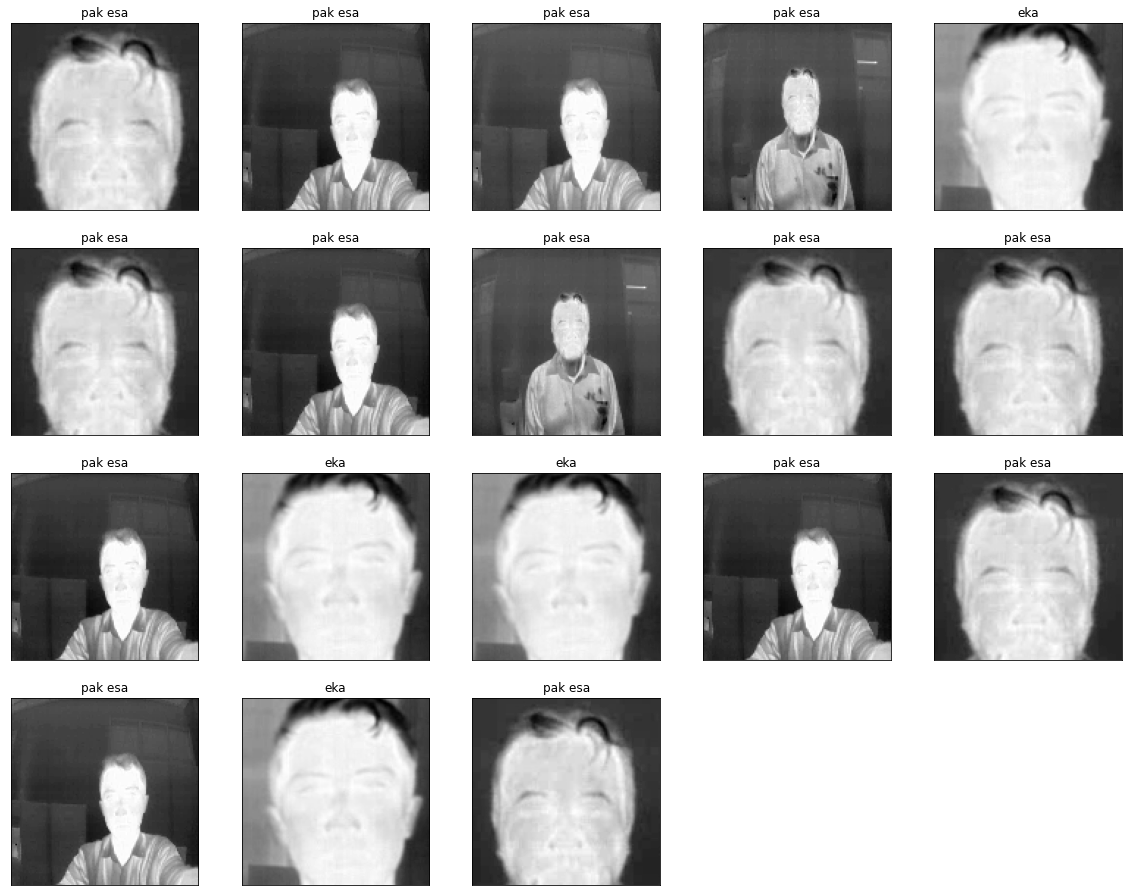

In [8]:
fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num+1)
    image = img_data
    data = img_data.reshape(128,128,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 0:
        my_label = 'eka'
    elif np.argmax(model_out) == 1:
        my_label = 'pak esa'
    elif np.argmax(model_out) == 2:
        my_label = 'Bowo'
    else:
        my_label = 'Tidak Dikenali'
        
    y.imshow(image, cmap='gray')
    plt.title(my_label)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

